<a href="https://colab.research.google.com/github/chrisalpuerto/Bball-shot-Detection/blob/main/BasketballHoopDetector1Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basketball and Hoop Detection Test Run Using YOLOv11

---

Previously, I created both seperate hoop and basketball detection models. In this model I will try to create a model that detects both hoop and basketballs, using YOLOv11 for better accuracy and compute time, instead of YOLOv8

In [1]:
!pip install ultralytics roboflow
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3

Import Dataset

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kSbyldBcppeFTfZOiAQr")
project = rf.workspace("robocon-qchql").project("hoops-chrie-ivyrc")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hoops-3 in yolov11:: 100%|██████████| 2658/2658 [00:00<00:00, 6869.96it/s]


Import YOLO to import pretrained Model. We will use pretrained model for now, because of its ability to detect basketballs and hoops faster with less data

In [3]:
print(dataset.location)

/content/Hoops-3


In [7]:
!ls /content/Hoops-3

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [8]:
import os, shutil
from sklearn.model_selection import train_test_split

# Paths
base_path = "/content/Hoops-3"
train_images = os.path.join(base_path, "train", "images")
train_labels = os.path.join(base_path, "train", "labels")

# Get all image files
images = os.listdir(train_images)
train_files, val_files = train_test_split(images, test_size=0.2, random_state=42)

# Create new valid/ folders
os.makedirs(os.path.join(base_path, "valid", "images"), exist_ok=True)
os.makedirs(os.path.join(base_path, "valid", "labels"), exist_ok=True)

# Move 20% of data into valid/
for file in val_files:
    shutil.move(os.path.join(train_images, file), os.path.join(base_path, "valid", "images", file))
    label_file = file.replace(".jpg", ".txt").replace(".png", ".txt")
    shutil.move(os.path.join(train_labels, label_file), os.path.join(base_path, "valid", "labels", label_file))


In [9]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")
model.train(data="/content/Hoops-3/data.yaml", epochs=80)


Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Hoops-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,230 parameters, 2,590,214 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 893.3±267.4 MB/s, size: 59.1 KB)


train: Scanning /content/Hoops-3/train/labels... 823 images, 1 backgrounds, 0 corrupt: 100%|██████████| 823/823 [00:00<00:00, 1789.31it/s]

train: New cache created: /content/Hoops-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 419.4±205.3 MB/s, size: 59.7 KB)


val: Scanning /content/Hoops-3/valid/labels... 449 images, 1 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<00:00, 1712.47it/s]

val: New cache created: /content/Hoops-3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      2.39G     0.9812      2.626      1.191         20        640: 100%|██████████| 52/52 [00:18<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.61it/s]


                   all        449        699          1     0.0257      0.386      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      2.79G      1.001       1.77      1.158         23        640: 100%|██████████| 52/52 [00:16<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.43it/s]


                   all        449        699      0.714      0.592       0.66      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80       2.8G      1.062      1.666      1.189         16        640: 100%|██████████| 52/52 [00:15<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.70it/s]

                   all        449        699      0.461      0.447       0.42      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      2.82G        1.1      1.606      1.215         23        640: 100%|██████████| 52/52 [00:14<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


                   all        449        699      0.613      0.551      0.551       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      2.83G      1.048      1.443      1.191         22        640: 100%|██████████| 52/52 [00:15<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.84it/s]


                   all        449        699      0.659      0.608      0.619      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      2.85G      1.012      1.271      1.172         18        640: 100%|██████████| 52/52 [00:15<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]


                   all        449        699      0.682      0.589      0.644      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      2.86G     0.9829      1.185      1.142         20        640: 100%|██████████| 52/52 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]


                   all        449        699      0.773      0.703      0.731      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      2.88G     0.9721      1.132      1.138         22        640: 100%|██████████| 52/52 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.12it/s]

                   all        449        699      0.757      0.689      0.744       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      2.89G     0.9463      1.041      1.129         14        640: 100%|██████████| 52/52 [00:15<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]

                   all        449        699      0.823      0.662      0.739      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80       2.9G     0.9229      1.043      1.128         17        640: 100%|██████████| 52/52 [00:16<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.37it/s]

                   all        449        699      0.787      0.664      0.764      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      2.92G     0.9241      1.011      1.116         24        640: 100%|██████████| 52/52 [00:15<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]


                   all        449        699      0.811      0.726      0.777      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      2.93G     0.9034     0.9706      1.104         25        640: 100%|██████████| 52/52 [00:15<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.21it/s]

                   all        449        699      0.796      0.707       0.77      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      2.95G     0.8738     0.9135      1.091         11        640: 100%|██████████| 52/52 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]


                   all        449        699      0.844      0.749        0.8      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      2.96G     0.8857     0.8991       1.08         20        640: 100%|██████████| 52/52 [00:14<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]

                   all        449        699      0.832      0.742      0.809      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      2.98G     0.8717     0.8846      1.098         22        640: 100%|██████████| 52/52 [00:14<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.84it/s]


                   all        449        699       0.76      0.742      0.766      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      2.99G     0.8569     0.8602      1.079         25        640: 100%|██████████| 52/52 [00:14<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]

                   all        449        699      0.818      0.813      0.855      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      3.01G     0.8645     0.8548      1.082          8        640: 100%|██████████| 52/52 [00:14<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]

                   all        449        699      0.821      0.776      0.822      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      3.03G     0.8433     0.8144      1.071         10        640: 100%|██████████| 52/52 [00:15<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]

                   all        449        699      0.827      0.804      0.838      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      3.04G     0.8088     0.7865      1.039         13        640: 100%|██████████| 52/52 [00:14<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]

                   all        449        699      0.887      0.781       0.84      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      3.05G     0.8028     0.7886      1.045         15        640: 100%|██████████| 52/52 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]

                   all        449        699      0.874      0.797      0.858      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      3.07G     0.8455     0.7865      1.054         26        640: 100%|██████████| 52/52 [00:14<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]

                   all        449        699      0.857      0.815      0.861       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      3.08G     0.8149     0.7445      1.039         17        640: 100%|██████████| 52/52 [00:15<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.66it/s]

                   all        449        699      0.864      0.818      0.852      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80       3.1G     0.8011     0.7555      1.058         12        640: 100%|██████████| 52/52 [00:14<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]

                   all        449        699      0.864      0.816      0.854      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      3.12G     0.7572     0.7003      1.016         20        640: 100%|██████████| 52/52 [00:15<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.42it/s]

                   all        449        699      0.871      0.819      0.859      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      3.13G     0.7816     0.7203      1.035         17        640: 100%|██████████| 52/52 [00:16<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]

                   all        449        699      0.866      0.777      0.859      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      3.14G     0.7538     0.7055      1.029         16        640: 100%|██████████| 52/52 [00:15<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]

                   all        449        699       0.87      0.787      0.846      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      3.16G     0.7478     0.6806      1.014         25        640: 100%|██████████| 52/52 [00:14<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.26it/s]

                   all        449        699      0.872      0.806      0.872        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      3.17G     0.7214     0.6562      1.009         12        640: 100%|██████████| 52/52 [00:15<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.77it/s]

                   all        449        699      0.871      0.814      0.858      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      3.19G     0.7648     0.6873      1.019         24        640: 100%|██████████| 52/52 [00:14<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.39it/s]

                   all        449        699       0.89      0.829      0.869      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      3.21G     0.7364     0.6582      1.023         14        640: 100%|██████████| 52/52 [00:15<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.58it/s]

                   all        449        699      0.857       0.84      0.872      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      3.21G     0.7375     0.6586       1.01         21        640: 100%|██████████| 52/52 [00:14<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]

                   all        449        699      0.873      0.858       0.88      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      3.23G     0.7413      0.659      1.017         16        640: 100%|██████████| 52/52 [00:14<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.35it/s]

                   all        449        699      0.878      0.823      0.871      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      3.25G     0.7259     0.6342      1.021         15        640: 100%|██████████| 52/52 [00:14<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.39it/s]

                   all        449        699        0.9      0.856      0.893      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      3.26G      0.696     0.6154      1.002         20        640: 100%|██████████| 52/52 [00:14<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.38it/s]


                   all        449        699      0.883      0.864      0.881      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      3.28G     0.6999     0.6082     0.9972         15        640: 100%|██████████| 52/52 [00:14<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]

                   all        449        699      0.896      0.826      0.877      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      3.29G     0.7278      0.633      1.009         12        640: 100%|██████████| 52/52 [00:15<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.30it/s]

                   all        449        699      0.892      0.817      0.875       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80       3.3G     0.7188     0.6102      0.999         25        640: 100%|██████████| 52/52 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.26it/s]

                   all        449        699      0.895      0.843      0.878       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      3.32G     0.6943     0.5997     0.9917         14        640: 100%|██████████| 52/52 [00:14<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.42it/s]

                   all        449        699      0.878      0.835      0.878      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      3.34G     0.6872     0.5753     0.9934         12        640: 100%|██████████| 52/52 [00:14<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.25it/s]

                   all        449        699      0.914      0.843      0.889       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      3.35G     0.6901     0.5964     0.9922         11        640: 100%|██████████| 52/52 [00:14<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.22it/s]

                   all        449        699      0.886      0.837      0.885      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      3.37G      0.668      0.578     0.9785         15        640: 100%|██████████| 52/52 [00:14<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]

                   all        449        699      0.916      0.857      0.904      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      3.38G     0.6961     0.5915     0.9872         14        640: 100%|██████████| 52/52 [00:14<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]

                   all        449        699      0.888      0.867      0.891      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      3.39G     0.6526     0.5666     0.9791         16        640: 100%|██████████| 52/52 [00:15<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.29it/s]

                   all        449        699      0.878      0.867      0.899      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      3.41G     0.6901     0.5635     0.9882         17        640: 100%|██████████| 52/52 [00:14<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]

                   all        449        699      0.883      0.874      0.893      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      3.42G     0.6626     0.5606     0.9828         15        640: 100%|██████████| 52/52 [00:15<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.40it/s]

                   all        449        699      0.894      0.864      0.891       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      3.44G     0.6475     0.5443     0.9689         17        640: 100%|██████████| 52/52 [00:14<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.35it/s]

                   all        449        699      0.881      0.882      0.898      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      3.45G     0.6668     0.5586     0.9781         18        640: 100%|██████████| 52/52 [00:15<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.63it/s]

                   all        449        699      0.905      0.867      0.892      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      3.47G     0.6712     0.5604     0.9741         12        640: 100%|██████████| 52/52 [00:14<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.49it/s]

                   all        449        699      0.909      0.863      0.895       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      3.48G     0.6418     0.5305     0.9674         18        640: 100%|██████████| 52/52 [00:16<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]

                   all        449        699      0.917      0.857      0.897      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80       3.5G     0.6241     0.5158     0.9676         13        640: 100%|██████████| 52/52 [00:14<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.51it/s]

                   all        449        699      0.936       0.86      0.901       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      3.51G     0.6345     0.5289     0.9631         18        640: 100%|██████████| 52/52 [00:15<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.69it/s]

                   all        449        699      0.913      0.882      0.903      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      3.53G     0.6248      0.516     0.9529         22        640: 100%|██████████| 52/52 [00:14<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]

                   all        449        699      0.915      0.868      0.901      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      3.54G     0.6273     0.5015     0.9626         25        640: 100%|██████████| 52/52 [00:14<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.20it/s]

                   all        449        699      0.893       0.88      0.896      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      3.56G     0.6101     0.4985      0.968         17        640: 100%|██████████| 52/52 [00:14<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.41it/s]

                   all        449        699      0.909      0.862      0.903      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      3.57G     0.6057      0.473     0.9598         17        640: 100%|██████████| 52/52 [00:14<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.30it/s]

                   all        449        699      0.917      0.863      0.911      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      3.59G     0.5929     0.4857     0.9503         15        640: 100%|██████████| 52/52 [00:14<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.37it/s]

                   all        449        699      0.884      0.859        0.9      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80       3.6G     0.5989     0.4794     0.9459         22        640: 100%|██████████| 52/52 [00:15<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.39it/s]

                   all        449        699      0.926       0.85      0.903      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      3.62G     0.6149     0.4786     0.9546         21        640: 100%|██████████| 52/52 [00:14<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]

                   all        449        699       0.91       0.88      0.913      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      3.63G      0.587     0.4535     0.9412         11        640: 100%|██████████| 52/52 [00:14<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]

                   all        449        699      0.929      0.875       0.91      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      3.65G     0.6016     0.4715     0.9496         18        640: 100%|██████████| 52/52 [00:15<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]

                   all        449        699      0.921      0.865      0.911      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      3.66G     0.5914     0.4656     0.9512         24        640: 100%|██████████| 52/52 [00:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.25it/s]

                   all        449        699      0.919      0.867      0.909      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      3.67G     0.5708     0.4372     0.9415         18        640: 100%|██████████| 52/52 [00:14<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]

                   all        449        699      0.928      0.881      0.915      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      3.69G     0.5723     0.4567     0.9324         16        640: 100%|██████████| 52/52 [00:14<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.46it/s]

                   all        449        699      0.916      0.877      0.914      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80       3.7G     0.5816     0.4609       0.95         18        640: 100%|██████████| 52/52 [00:14<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.49it/s]

                   all        449        699      0.888      0.897      0.912       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      3.72G     0.5712     0.4375     0.9452         14        640: 100%|██████████| 52/52 [00:14<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.44it/s]

                   all        449        699      0.932      0.866      0.915      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      3.73G     0.5572     0.4588     0.9335         26        640: 100%|██████████| 52/52 [00:14<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]

                   all        449        699      0.924      0.883      0.915      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      3.75G     0.5618     0.4468     0.9355         16        640: 100%|██████████| 52/52 [00:15<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]

                   all        449        699      0.927      0.879      0.919      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      3.77G     0.5505     0.4362     0.9345          8        640: 100%|██████████| 52/52 [00:14<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]

                   all        449        699      0.929       0.88      0.918      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      3.78G     0.5401     0.4194     0.9216         18        640: 100%|██████████| 52/52 [00:14<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.65it/s]

                   all        449        699      0.931      0.881      0.919      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      3.79G     0.5617     0.4281     0.9329         18        640: 100%|██████████| 52/52 [00:14<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.42it/s]

                   all        449        699      0.939      0.862       0.92      0.788


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      3.81G     0.4986     0.3775     0.8805         10        640: 100%|██████████| 52/52 [00:16<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.41it/s]

                   all        449        699      0.921      0.889      0.921      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      3.82G     0.4938     0.3601      0.879         15        640: 100%|██████████| 52/52 [00:14<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]

                   all        449        699      0.914      0.892      0.922      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      3.84G     0.4767     0.3341     0.8639          9        640: 100%|██████████| 52/52 [00:14<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]


                   all        449        699      0.933      0.874      0.923      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      3.85G      0.467     0.3384     0.8641         14        640: 100%|██████████| 52/52 [00:14<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]

                   all        449        699      0.944      0.872      0.923      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      3.87G     0.4592     0.3319     0.8659         12        640: 100%|██████████| 52/52 [00:14<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]

                   all        449        699      0.923      0.893      0.925      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      3.89G     0.4692     0.3301     0.8668         10        640: 100%|██████████| 52/52 [00:14<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]

                   all        449        699      0.922      0.892      0.928      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80       3.9G     0.4478      0.328     0.8643          7        640: 100%|██████████| 52/52 [00:14<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.40it/s]

                   all        449        699      0.907      0.905      0.928      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      3.91G     0.4558     0.3274     0.8611         11        640: 100%|██████████| 52/52 [00:14<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.31it/s]

                   all        449        699      0.935      0.879      0.927      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      3.93G     0.4574     0.3233     0.8627         14        640: 100%|██████████| 52/52 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]

                   all        449        699      0.936      0.881      0.928      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      3.94G     0.4441     0.3106     0.8486         15        640: 100%|██████████| 52/52 [00:14<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.51it/s]

                   all        449        699      0.922      0.891      0.928      0.797



80 epochs completed in 0.434 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.70it/s]


                   all        449        699      0.908      0.905      0.928      0.798
                     0        210        249      0.858      0.824      0.865      0.715
                     1        422        450      0.959      0.987      0.991      0.881
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b9f9148f510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [10]:
model = YOLO("runs/detect/train/weights/best.pt")
model.val()

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1205.5±545.4 MB/s, size: 54.4 KB)


val: Scanning /content/Hoops-3/valid/labels.cache... 449 images, 1 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.28it/s]


                   all        449        699      0.908      0.903      0.929      0.799
                     0        210        249      0.857       0.82      0.866      0.717
                     1        422        450      0.959      0.987      0.991      0.882
Speed: 1.3ms preprocess, 6.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ba0d3ae1990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [11]:
# The model.val() method returns a metrics object
metrics = model.val()

# Accessing the accuracy metrics
print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 935.9±518.2 MB/s, size: 61.7 KB)


val: Scanning /content/Hoops-3/valid/labels.cache... 449 images, 1 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.66it/s]


                   all        449        699      0.908      0.903      0.929      0.799
                     0        210        249      0.857       0.82      0.866      0.717
                     1        422        450      0.959      0.987      0.991      0.882
Speed: 2.0ms preprocess, 4.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val2
mAP50: 0.9285018094407048
mAP50-95: 0.7993033504856515


In [12]:
import cv2

In [18]:
!ls /content/Hoops-3/train

images	labels	labels.cache


!ls /content/basketball-1/train/images

In [19]:
import os
train_path1 = "/content/Hoops-3/train/images"

images = os.listdir(train_path1)

In [20]:
print(images[:10])

['466_jpg.rf.2123d9dfdfb2cfab21ec02ff51abc6d3.jpg', '1309_jpg.rf.870748ee917613eb59942ce237295b0f.jpg', '370_jpg.rf.2c3721959dd5475f4da1f6adfbb69ebb.jpg', '459_jpg.rf.2dfcb12f7eb76cb07c2560928edca2b9.jpg', 'res26700_png_jpg.rf.e8978bc95c670fe753fd50c2ac718fda.jpg', 'bf03f74ee9b7bd6871702eb3e60a97cb_jpeg_jpg.rf.9c301c9f3a230290fbe9477abef6a805.jpg', 'image_1205_jpg.rf.84c54296a1209f55724744e4d5ea1aea.jpg', '0048_jpg.rf.82bb49b36a211c02681a3b2b173acf00.jpg', '439_jpg.rf.04ec4426f96345461cd239d97d903039.jpg', '0548_jpg.rf.e2991fac015d09cbdc094555538a86a6.jpg']


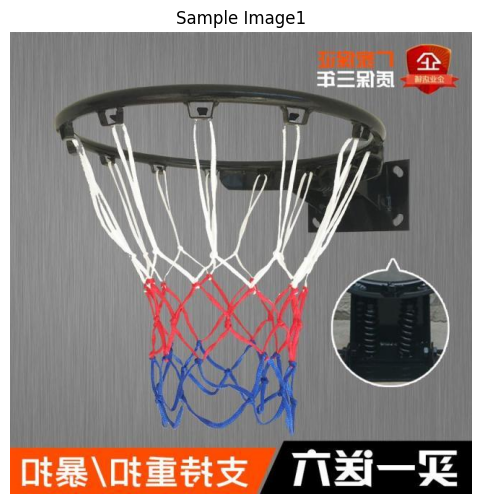

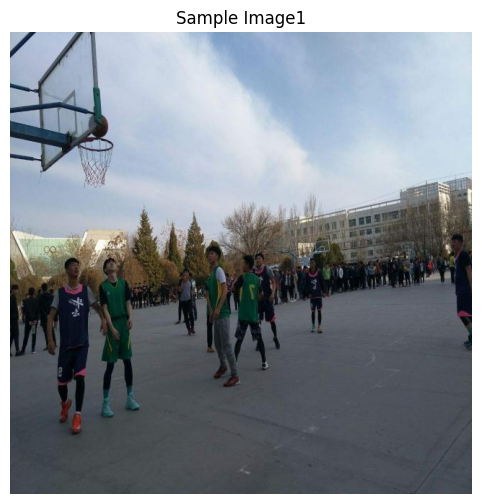

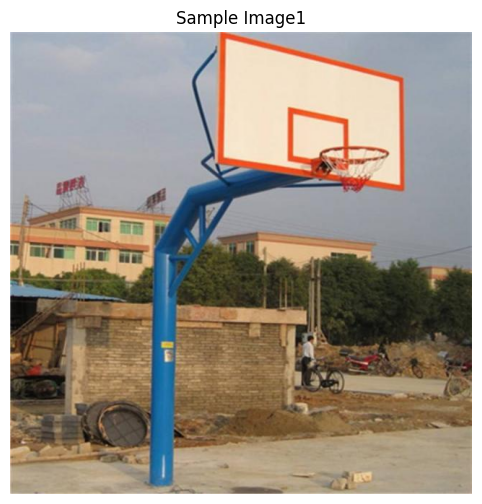

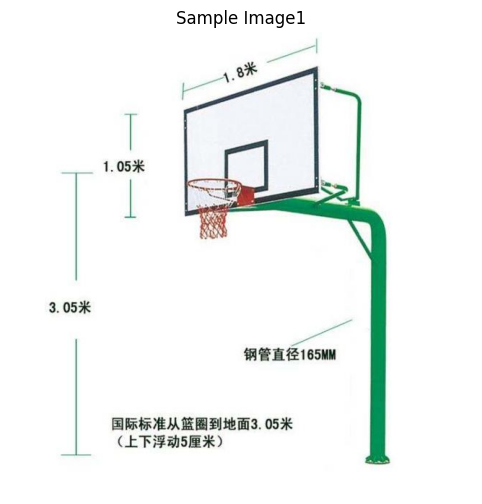

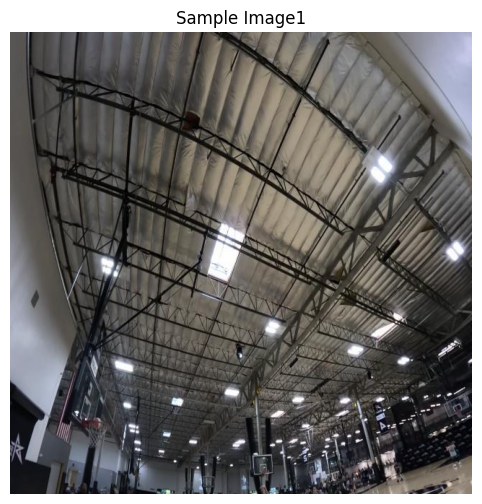

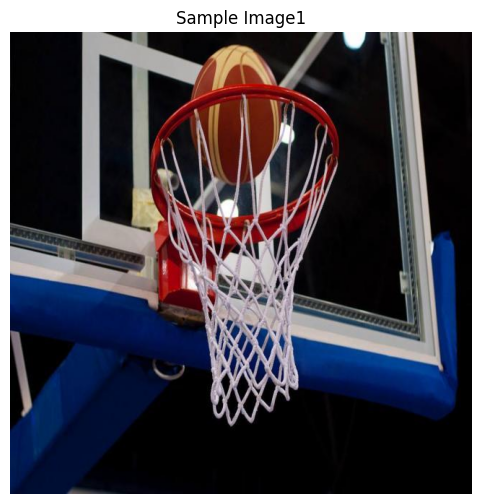

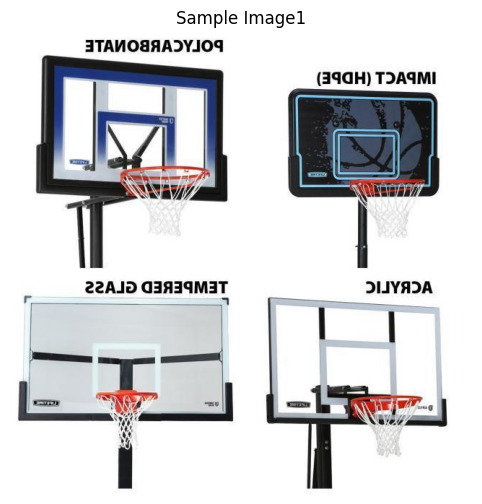

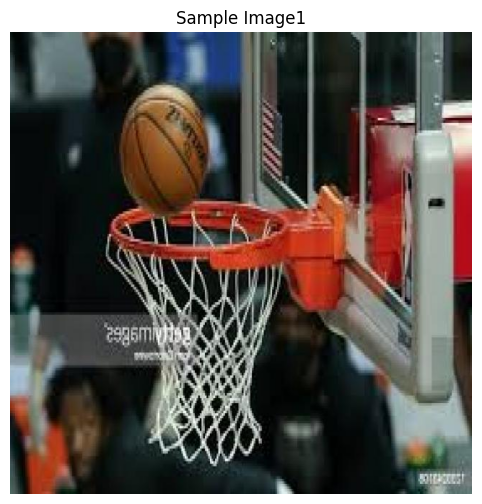

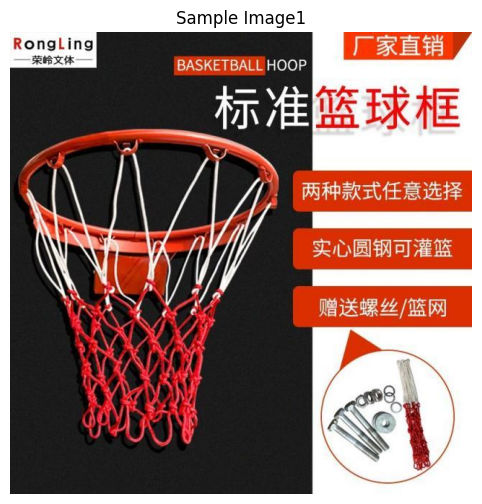

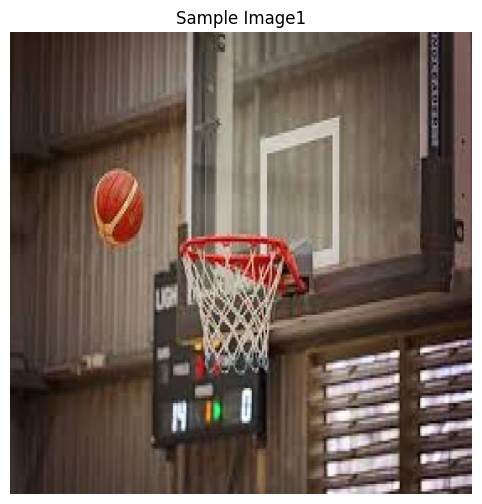

In [23]:
import matplotlib.pyplot as plt

for i in range(10):
  image1 = images[i]
  image_path1 = os.path.join(train_path1, image1)
  # load with opencv
  img1 = cv2.imread(image_path1)
  img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

  plt.figure(figsize=(8,6))
  plt.imshow(img_rgb)
  plt.axis('off')
  plt.title('Sample Image1')
  plt.show()


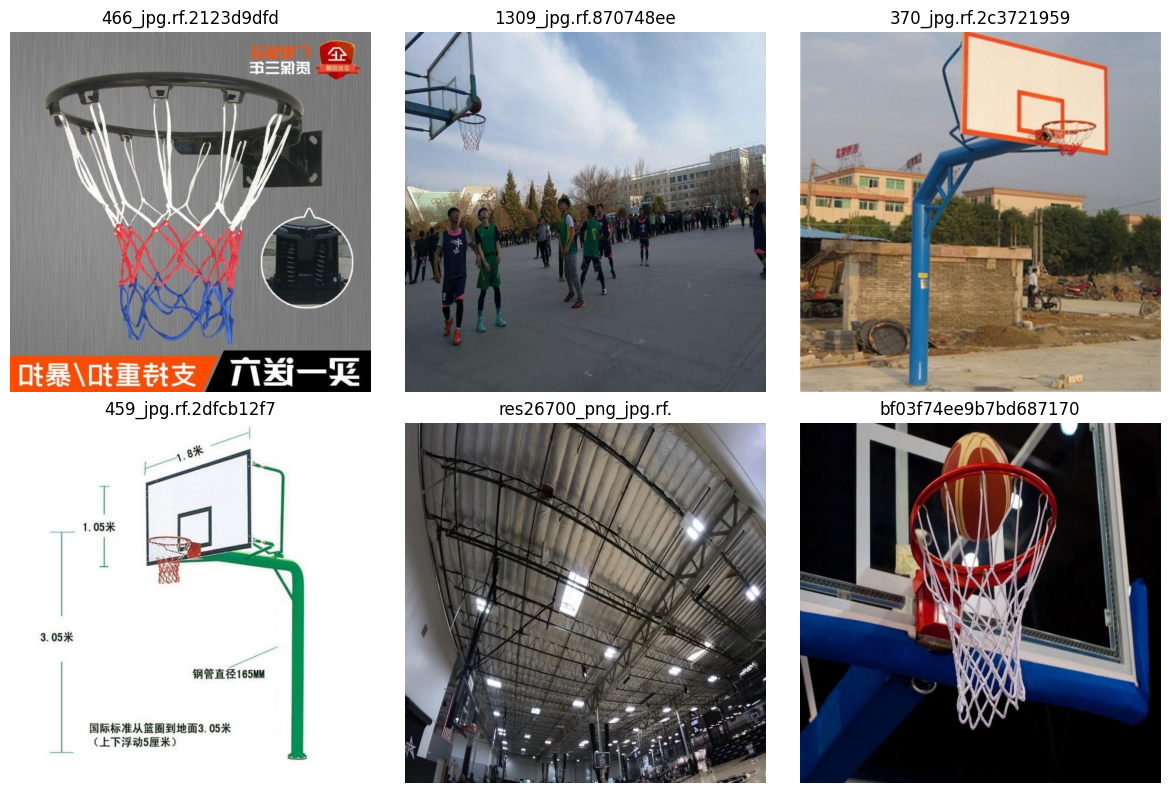

In [24]:
images = os.listdir(train_path1)[:6]  # Show first 6
plt.figure(figsize=(12, 8))

for i, fname in enumerate(images):
    img = cv2.imread(os.path.join(train_path1, fname))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(fname[:20])

plt.tight_layout()
plt.show()

In [25]:
!ls runs

detect


In [26]:
!ls /content/basketball-1/train

ls: cannot access '/content/basketball-1/train': No such file or directory


In [ ]:
!ls runs/detect/train

In [ ]:
!ls runs/detect/train/weights

In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
!ls /test_images1

In [ ]:
!ls test_images1

# Testing
Here I am testing my ML model on just 7 different pictures, 4 pictures of basketballs and 3 pictures of random objects. I will check how accurate my model is

In [ ]:
test_images = "/test_images1"
test_path = os.listdir(test_images)
print(test_path[:4])

In [ ]:
test_files = [img for img in test_path if img.endswith((".jpg", ".jpeg", ".png", ".webp"))]

for img in test_files:
    test_img_path = os.path.join(test_images, img)
    res = model(test_img_path)[0]

    img_w_boxes = res.plot()
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img_w_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(img)

    ball_count = sum(1 for c in res.boxes.cls if c == 0)
    print(f"Number of basketballs in {img}: {ball_count}")
    plt.show()

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!ls -la /content

total 6396
drwxr-xr-x 1 root root    4096 Aug  7 18:01 .
drwxr-xr-x 1 root root    4096 Aug  7 17:17 ..
-rw-r--r-- 1 root root    6982 Aug  7 18:01 ball1.jpeg
-rw-r--r-- 1 root root   28863 Aug  7 18:01 bball2.jpg
-rw-r--r-- 1 root root  362817 Aug  7 18:01 bball3.jpg
-rw-r--r-- 1 root root  243553 Aug  7 18:01 bball4.png
drwxr-xr-x 4 root root    4096 Aug  6 13:38 .config
drwxr-xr-x 5 root root    4096 Aug  7 17:21 Hoops-3
-rw-r--r-- 1 root root  205985 Aug  7 18:01 random1.jpg
-rw-r--r-- 1 root root   38378 Aug  7 18:01 random2.webp
-rw-r--r-- 1 root root    5867 Aug  7 18:01 random3.jpeg
drwxr-xr-x 3 root root    4096 Aug  7 17:23 runs
drwxr-xr-x 1 root root    4096 Aug  6 13:39 sample_data
-rw-r--r-- 1 root root 5613764 Aug  7 17:21 yolo11n.pt


In [32]:
!cp runs/detect/train/weights/best.pt "/content/drive/MyDrive/BallHoop_Model2.pt"

In [ ]:
!git add .

This is some text above the line.

---

This is some text below the line.

***

And another line for good measure.

___